In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openai
from numpy import nan
import re

%matplotlib inline

In [2]:
dsscdb_df = pd.read_csv("rawDSSCDBdata.csv")
dsscdb_df.head(3)

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,...,Article EID,Article year,Article year.1,Article electronic id,Article keywords,Molecule SMILE,Molecule keywords,Molecule spectrum absorption maxima,Molecule spectrum emission maxima,Molecule spectrum solvent
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,-,-,-,TiO2 (20 nm particle size),-,...,NaN,01/01/2012,Hong_2012,NaN,NaN,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,phenothiazine,439.0,576.0,CH2Cl2/MeOH (1:1)
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine",465.0,640.0,dichloromethane
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,"coumarin, triphenylamine",460.0,590.0,dichloromethane


Filter compltely unnecessary columns pretaining to the articles and spectra

In [3]:
article_spectrum_info = []

for descriptor in dsscdb_df.columns:
    if ('Article' in descriptor) or ('comment' in descriptor) or('spectrum' in descriptor):
        article_spectrum_info.append(descriptor)


In [4]:
comments, article_doi = dsscdb_df["Performance comment"], dsscdb_df["Article DOI"]

In [5]:
dsscdb_df = dsscdb_df.drop(article_spectrum_info, axis='columns')
dsscdb_df.head()

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE,Molecule keywords
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,-,-,-,TiO2 (20 nm particle size),-,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,phenothiazine
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine"
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,"coumarin, triphenylamine"
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,"coumarin, triphenylamine"
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine"


In [6]:
dye_family = dsscdb_df["Molecule keywords"]

In [7]:
dye_family.to_csv("dye_family.csv")
comments.to_csv("device_comments.csv")
article_doi.to_csv("article_doi.csv")

Auxillary Information that may be useful in the future is now stored:
Let's continue

In [8]:
dsscdb_df = dsscdb_df.drop(["Molecule keywords"], axis=1)


In [9]:

dsscdb_df.head(3)


,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,-,-,-,TiO2 (20 nm particle size),-,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...


In [10]:
dsscdb_df = dsscdb_df.replace("-", np.nan)
dsscdb_df

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,NaN,NaN,NaN,TiO2 (20 nm particle size),NaN,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,NaN,24 hours,"AM 1.5G, 100 mw/cm2",S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...
4422,651.0,9.93,0.70,4.52,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,296 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...
4423,667.0,12.85,0.71,6.09,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,224 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...
4424,659.0,12.46,0.69,5.65,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,187 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...


In [11]:
dsscdb_df.to_csv("dsscdb_trimmed.csv")

Cleaning Exposure Time

In [12]:
def isntFloat(var):
    try:
        float(var)
        return False
    except ValueError:
        return True

def clean_exposure_time(exposure_time_str):
    print(exposure_time_str)
    if isntFloat(exposure_time_str):
        is_range = "-" in exposure_time_str
        is_inMin = "min" in exposure_time_str

        exposure_time_values = [float(s) for s in re.findall(r'\b[\d]*[.][\d]+\b|\b[\d]+\b', exposure_time_str)]
        print(exposure_time_values)

        if len(exposure_time_values) == 1:
            exposure_time = exposure_time_values[0]
            if is_inMin:
                exposure_time = round(exposure_time/60, 3)
            cosensitization_time = np.nan
        else:
            if is_range:
                if "WS-5" not in exposure_time_str:
                    exposure_time = round((sum(exposure_time_values) / len(exposure_time_values)), 3)
                    cosensitization_time = np.nan
                else:
                    exposure_time = exposure_time_values[0]
                    cosensitization_time = np.nan
            else:
                exposure_time = max(exposure_time_values)
                cosensitization_time = min(exposure_time_values)
    else:
        exposure_time = exposure_time_str
        cosensitization_time = np.nan
    print(exposure_time, cosensitization_time)
    return exposure_time, cosensitization_time


In [13]:
dsscdb_df['Exposure time (h)'], dsscdb_df['Cosensitization time (h)'] = zip(*dsscdb_df['Exposure time'].apply(clean_exposure_time))


15 hours
[15.0]
15.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
5 hours
[5.0]
5.0 nan
24 hours
[24.0]
24.0 nan
24 hours
[24.0]
24.0 nan
24 hours
[24.0]
24.0 nan
24 hours
[24.0]
24.0 nan
24 hours
[24.0]
24.0 nan
24 hours
[24.0]
24.0 nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
nan
nan nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
24 hours
[24.0]
24.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0 nan
12 hours
[12.0]
12.0

In [14]:
dsscdb_df.head()


,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE,Exposure time (h),Cosensitization time (h)
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,NaN,NaN,NaN,TiO2 (20 nm particle size),NaN,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,NaN
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,NaN
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,NaN
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN


In [15]:
dsscdb_df.to_csv("dsscdb_expt_cleaned.csv")

In [27]:
def clean_solar_simulator(solar_simulator_str):
    items_to_remove = ["AM", "mW/cm2", "mw/cm2", "G", "1.5", "% sun", " sun", ",", "-"]

    if isntFloat(solar_simulator_str):
        for item in items_to_remove:
            solar_simulator_str = ''.join(solar_simulator_str.split(item))
        
        bare_value = solar_simulator_str.strip()
        print(bare_value)
        if bare_value == '':
            final_value = np.nan
        else:
            final_value = float(bare_value)
        
        if final_value < 1.0:
            final_value = final_value*100
    else:
        final_value = solar_simulator_str
    print(final_value)
    return final_value

In [28]:
dsscdb_df.groupby(['Solar simulator']).count()

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Molecule SMILE,Exposure time (h),Cosensitization time (h)
Solar simulator,,,,,,,,,,,,,,
0.065 mW/cm2,3,3,3,3,3,3,3,0,3,0,3,3,3,0
0.313 mW/cm2,1,1,1,1,1,1,1,0,1,0,1,1,1,0
0.336 mW/cm2,1,1,1,1,1,1,1,0,1,0,1,1,1,0
0.338 mW/cm2,1,1,1,1,1,1,1,0,1,0,1,1,1,0
95mW/cm2 AM 1.5G,1,1,1,1,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AM 1.5G,97.8 mW/cm2",1,1,1,1,1,1,1,0,1,0,1,1,1,0
AM1.5 G 100 mW/cm2,7,7,7,7,7,7,0,0,7,0,0,7,0,0
AM1.5G,3,3,3,3,3,3,0,0,3,3,3,3,3,0


In [29]:
dsscdb_df['Solar simulator at 1.5G (mW/cm2)'] = dsscdb_df['Solar simulator'].apply(clean_solar_simulator)

100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0
100
100.0


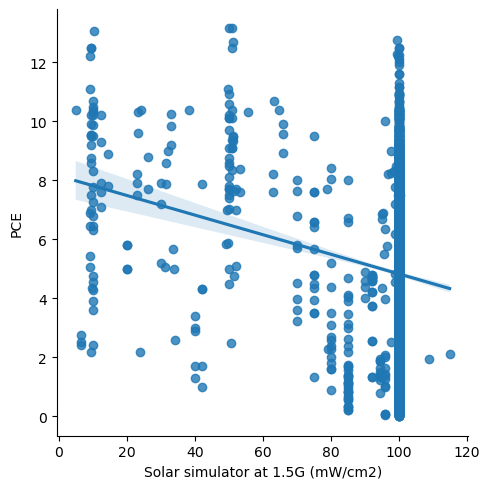

In [30]:
sns.lmplot(data=dsscdb_df, x="Solar simulator at 1.5G (mW/cm2)", y="PCE")

In [31]:
dsscdb_df

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE,Exposure time (h),Cosensitization time (h),Solar simulator at 1.5G (mW/cm2)
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,NaN,NaN,NaN,TiO2 (20 nm particle size),NaN,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,NaN,100.0
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,NaN,100.0
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,NaN,100.0
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,NaN,24 hours,"AM 1.5G, 100 mw/cm2",S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,24.0,NaN,100.0
4422,651.0,9.93,0.70,4.52,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,296 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,24.0,NaN,100.0
4423,667.0,12.85,0.71,6.09,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,224 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0
4424,659.0,12.46,0.69,5.65,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,187 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0


In [34]:
dsscdb_df.groupby(["Dye loading"]).count().index

Index(['0.07 nmol/cm2', '0.073 nmol/cm2', '0.0832 nmol/cm2', '0.09 nmol/cm2',
       '0.093 nmol/cm2', '0.094 nmol/cm2', '0.0958 nmol/cm2', '0.1 nmol/cm2',
       '0.10 nmol/cm2', '0.11 nmol/cm2',
       ...
       '95 nmol/cm2', '95 nmol/cm2 + 52 nmol/cm2', '96 nmol/cm2',
       '960 nmol/cm2', '97 nmol/cm2', '976 nmol/cm2', '98 nmol/cm2',
       '99 nmol/cm2', '99.7 nmol/cm2', '996 nmol/cm2'],
      dtype='object', name='Dye loading', length=533)

In [44]:
def clean_dye_loading(dye_str):
    print(dye_str)
    if isntFloat(dye_str):
        dye_loading_lst = re.findall(r"[-+]?(?:\d*\.*\d+)", dye_str)
        dye_loading = dye_loading_lst[0]
        
    else:
        dye_loading = dye_str
    print(dye_loading)
    return dye_loading

In [45]:
dsscdb_df["Dye loading (nmol/cm2)"] = dsscdb_df["Dye loading"].apply(clean_dye_loading)
dsscdb_df

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
97 nmol/cm2
97
75 nmol/cm2
75
57 nmol/cm2
57
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
117 nmol/cm2
117
212 nmol/cm2
212
212 nmol/cm2
212
202 nmol/cm2
202
202 nmol/cm2
202
187 nmol/cm2
187
nan
nan
230 nmol/cm2
230
130 nmol/cm2
130
220 nmol/cm2
220
170 nmol/cm2
170
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
143 nmol/cm2
143
nan
nan


,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,Exposure time,Solar simulator,Molecule SMILE,Exposure time (h),Cosensitization time (h),Solar simulator at 1.5G (mW/cm2),Dye loading (nmol/cm2)
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,NaN,NaN,NaN,TiO2 (20 nm particle size),NaN,15 hours,AM 1.5G 100 mW/cm2,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,15.0,NaN,100.0,NaN
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,5.0,NaN,100.0,NaN
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,5.0,NaN,100.0,NaN
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,NaN,NaN,TiO2 film (8 uM thick + 5 uM scattering layer),NaN,5 hours,AM 1.5G 100mW/cm2,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,5.0,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,NaN,24 hours,"AM 1.5G, 100 mw/cm2",S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,24.0,NaN,100.0,NaN
4422,651.0,9.93,0.70,4.52,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,296 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,24.0,NaN,100.0,296
4423,667.0,12.85,0.71,6.09,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,224 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,224
4424,659.0,12.46,0.69,5.65,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,NaN,NaN,TiO2 film 14 um,187 nmol/cm2,24 hours,"AM 1.5G, 100 mw/cm2",COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,24.0,NaN,100.0,187


In [58]:
semiconductor_types = ["TiO2", "ZnO", "NiO", "SnO2", "Zn2SnO4"]

def expand_semiconductor_description(semiconductor_series, semiconductor_types):
    semiconductor_dict = dict()
    semi_type_lst = []
    thickness_lst = []
    scattering_lst = []
    film_particle_lst = []
    scattering_particle_lst = []

    for index, value in semiconductor_series.items():
        thickness=0
        scattering=0
        print(value)
        

        # retrieve type of semiconductor we're looking at

        for semi_type in semiconductor_types:
            if semi_type in value:
                selected_type = semi_type
                break
            else:
                if semi_type == "zinc titanium oxide film":
                    selected_type = "ZnO+TiO2"
                else:
                    selected_type = value
            
                
            
        semi_type_lst.append(selected_type)
            
        print(selected_type)
        # retrieve numerical values here
        # scattering layer should always be less than the film thickness 

        # remove nano particle information
        remove_nm_value = ''.join(re.split(r'........nm+|....nm+|...nm+', value))
        print(remove_nm_value)

        isRangeFilm = "-" in remove_nm_value

        numerical_film_values = [float(s) for s in re.findall(r'\b[\d]*[.][\d]+|\b[\d]+', remove_nm_value)]

        numerical_particle_values = [float(p) for p in re.findall(r'\b[\d]*[.][\d]+|\b[\d]+', ''.join(re.findall(r'........nm+|....nm+|...nm+', value)))]

        isRangeParticle = "-" in ''.join(re.findall(r'........nm+', value))
        
        # film and scattering size 
        print(numerical_film_values)
        print(numerical_particle_values)

        if len(numerical_film_values) == 0:
            thickness = np.nan
            scattering = np.nan

        elif len(numerical_film_values) == 1:
                thickness = numerical_film_values[0]
                scattering = np.nan
        else:
            if isRangeFilm:
                if len(numerical_film_values) == 2:
                    thickness = sum(numerical_film_values) / len(numerical_film_values)
                    scattering = np.nan
                else:
                    thickness = sum(numerical_film_values[0:2]) / 2
                    scattering = numerical_film_values[2]
            else:
                thickness = max(numerical_film_values)
                scattering = min(numerical_film_values)
       

        if len(numerical_particle_values) == 0:
            particle = np.nan
            scattering_particle = np.nan

        elif len(numerical_particle_values) == 1:

            if numerical_particle_values[0] < 100:
                particle = numerical_particle_values[0]
                scattering_particle = np.NaN
            else:
                particle = np.NaN
                scattering_particle = numerical_particle_values[0]

        elif len(numerical_particle_values) == 2:
            if isRangeParticle:
                particle = sum(numerical_particle_values)/len(numerical_particle_values)
                scattering_particle = np.NaN
            else:
                particle = min(numerical_particle_values)
                scattering_particle = max(numerical_particle_values)
        else:
            particle = sum(numerical_particle_values[:2]) / len(numerical_particle_values[:2])
            scattering_particle = sum(numerical_particle_values[2:]) / len(numerical_particle_values[2:])

        # # small exception handling

        if particle == 17.5 and scattering_particle == 500:
            scattering_particle = 400

        if thickness == 4.0 and scattering == 3.5:
            scattering = 4.0

        print(thickness, scattering)
        print(particle, scattering_particle)
        thickness_lst.append(thickness)
        scattering_lst.append(scattering)
        film_particle_lst.append(particle)
        scattering_particle_lst.append(scattering_particle)

    print(len(semi_type_lst), len(thickness_lst), len(scattering_lst))
    semiconductor_dict["Semiconductor Type"] = semi_type_lst
    semiconductor_dict["Semiconductor Film Thickness (um)"] = thickness_lst
    semiconductor_dict["Semiconductor Scattering Layer Thickness (um)"] = scattering_lst
    semiconductor_dict["Semiconductor Film Particle Size (nm)"] = film_particle_lst
    semiconductor_dict["Semiconductor Scattering Layer Particle Size (nm)"] = scattering_particle_lst
    
    semiconductor_df = pd.DataFrame.from_dict(semiconductor_dict)

    return semiconductor_df


In [59]:
semiconductor_df = expand_semiconductor_description(dsscdb_df["Semiconductor"], semiconductor_types)
semiconductor_df

TiO2 (20 nm particle size)
TiO2
T particle size)
[]
[20.0]
nan nan
20.0 nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick + 5 uM scattering layer)
TiO2
TiO2 film (8 uM thick + 5 uM scattering layer)
[8.0, 5.0]
[]
8.0 5.0
nan nan
TiO2 film (8 uM thick

,Semiconductor Type,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Semiconductor Film Particle Size (nm),Semiconductor Scattering Layer Particle Size (nm)
0,TiO2,NaN,NaN,20.0,NaN
1,TiO2,8.0,5.0,NaN,NaN
2,TiO2,8.0,5.0,NaN,NaN
3,TiO2,8.0,5.0,NaN,NaN
4,TiO2,8.0,5.0,NaN,NaN
...,...,...,...,...,...
4421,TiO2,14.0,NaN,NaN,NaN
4422,TiO2,14.0,NaN,NaN,NaN
4423,TiO2,14.0,NaN,NaN,NaN
4424,TiO2,14.0,NaN,NaN,NaN


In [60]:
semiconductor_df.groupby(['Semiconductor Type']).count()

,Semiconductor Film Thickness (um),Semiconductor Scattering Layer Thickness (um),Semiconductor Film Particle Size (nm),Semiconductor Scattering Layer Particle Size (nm)
Semiconductor Type,,,,
NiO,7,0,0,0
SnO2,3,0,0,0
TiO2,3776,1893,93,78
Zn2SnO4,4,0,0,0
ZnO,34,0,0,0
zinc titanium oxide film,0,0,0,0
